In [7]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

### Classical

In [8]:
audio_path = './data/genres/classical/classical.00000.au'
y, sr = librosa.load(audio_path)

In [9]:
print(y)
print(len(y))
print('Sampling rate (Hz): %d' %sr)
print('Audio length (seconds): %.2f'%(len(y)/sr)) # 음악의 길이(초) = 음파의 길이(y)/Sampling rate(sr)

[-0.02008057 -0.01748657  0.00418091 ...  0.01934814  0.027771
  0.03131104]
661794
Sampling rate (Hz): 22050
Audio length (seconds): 30.01


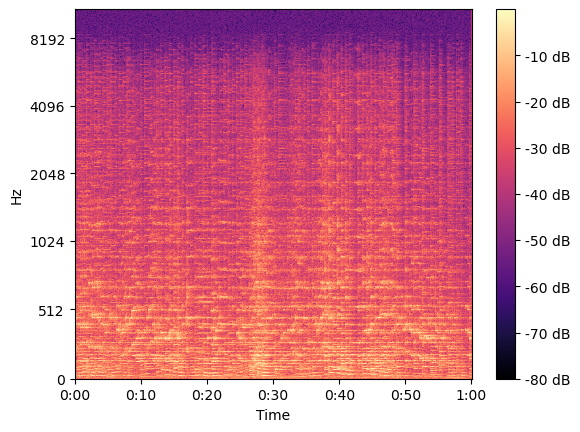

In [10]:
# STFT(Short Time Fourier Transform)
stft_result = librosa.stft(y, n_fft=4096, win_length = 4096, hop_length=512)
D = np.abs(stft_result)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = 1024, y_axis='mel', x_axis='time')
plt.colorbar(format='%2.0f dB')
plt.show()

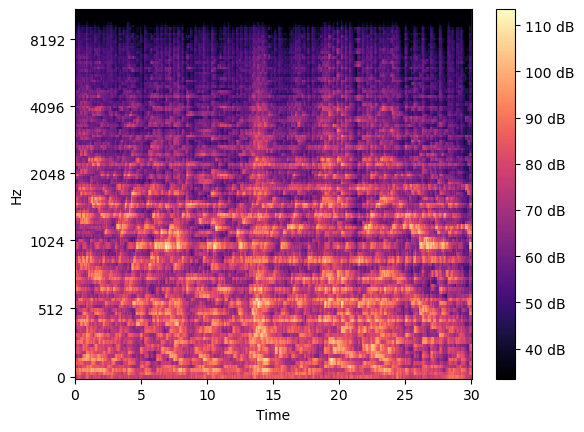

In [11]:
# Mel Spectrogram 생성
D = np.abs(librosa.stft(y, n_fft=4096, win_length=4096, hop_length=512))
mel_spec = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=128, hop_length=512, win_length=4096)
librosa.display.specshow(librosa.amplitude_to_db(mel_spec, ref=0.00002), sr=sr, hop_length=512, y_axis='mel', x_axis='time')
plt.colorbar(format='%2.0f dB')
plt.show()

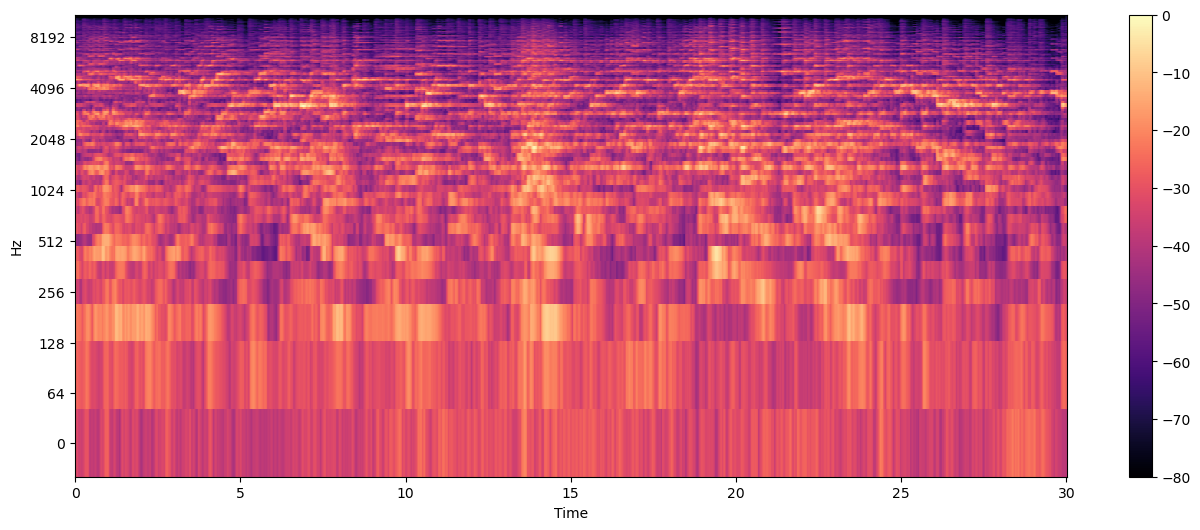

In [12]:
# MFCC 생성
D = np.abs(librosa.stft(y, n_fft=4096, win_length = 4096, hop_length=512))
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(D), sr=sr, n_mfcc=40)

S_DB = librosa.amplitude_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, sr=sr,hop_length=512, x_axis='time',y_axis='log')
plt.colorbar()
plt.show()

In [13]:
# 오디오 특성 추출
tempo = librosa.beat.beat_track(y=y,sr=sr)
print(tempo)

(95.703125, array([  13,   40,   66,   94,  119,  146,  173,  201,  229,  257,  283,
        310,  338,  364,  393,  420,  447,  475,  501,  528,  556,  584,
        612,  640,  667,  694,  720,  748,  775,  803,  829,  856,  883,
        911,  939,  966,  993, 1021, 1050, 1078, 1106, 1133, 1161, 1190,
       1217]))


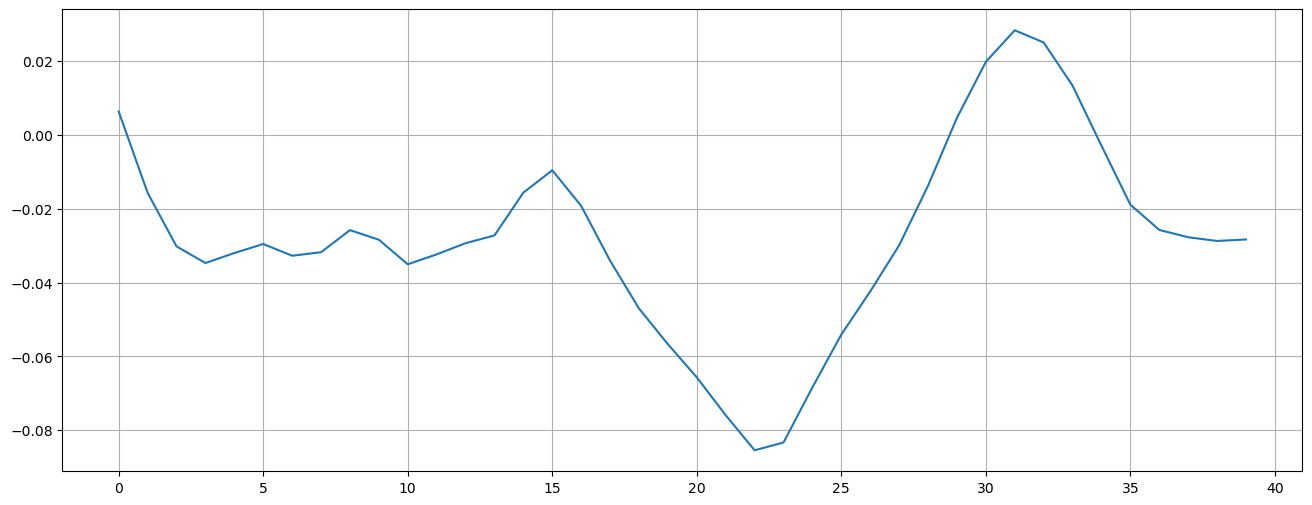

In [14]:
n0=9000
n1=9040

plt.figure(figsize=(16,6))
plt.plot(y[n0:n1])
plt.grid()
plt.show()

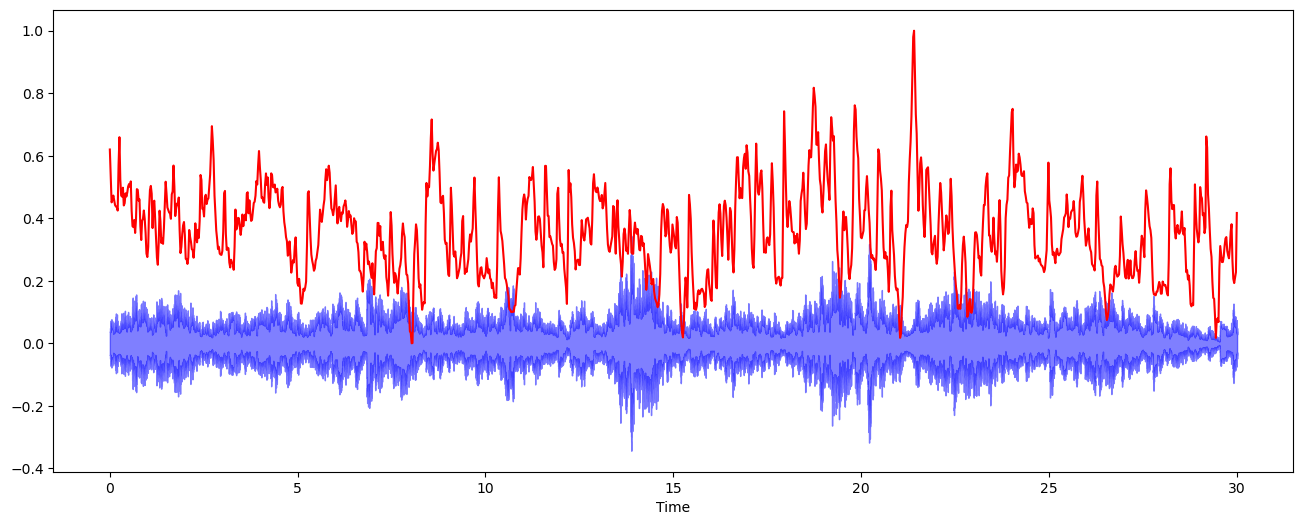

In [15]:
# Spectral Centroid (소리 무게중심)
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

frames = range(len(spectral_centroids))

t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(16,6))
librosa.display.waveshow(y=y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

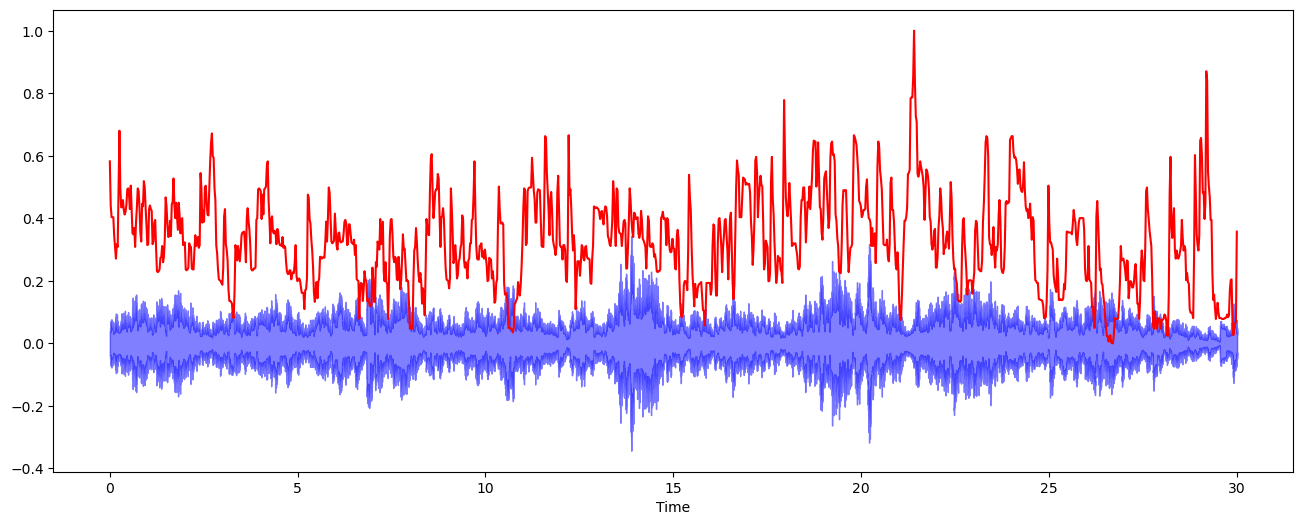

In [16]:
# 신호모양 측정
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

plt.figure(figsize=(16,6))
librosa.display.waveshow(y=y,sr=sr,alpha=0.5,color='b')
plt.plot(t, normalize(spectral_rolloff),color='r')
plt.show()

mean: 0.51
var: 0.03


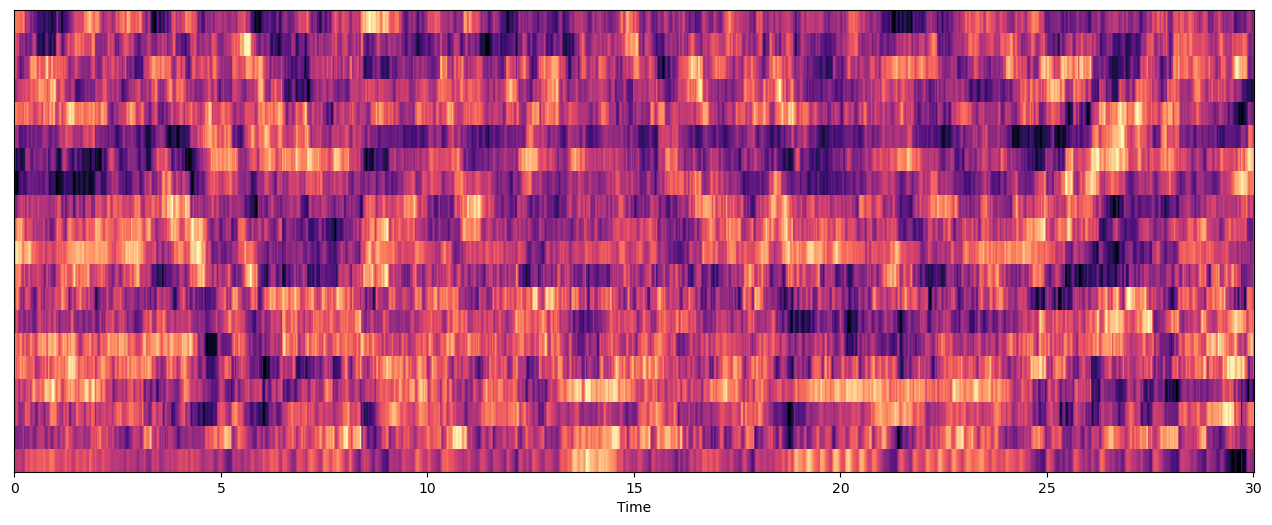

In [17]:
# MFCCs 추출
mfccs = librosa.feature.mfcc(y=y, sr=sr)
mfccs = normalize(mfccs,axis=1)

print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())

plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs,sr=sr, x_axis='time')
plt.show()

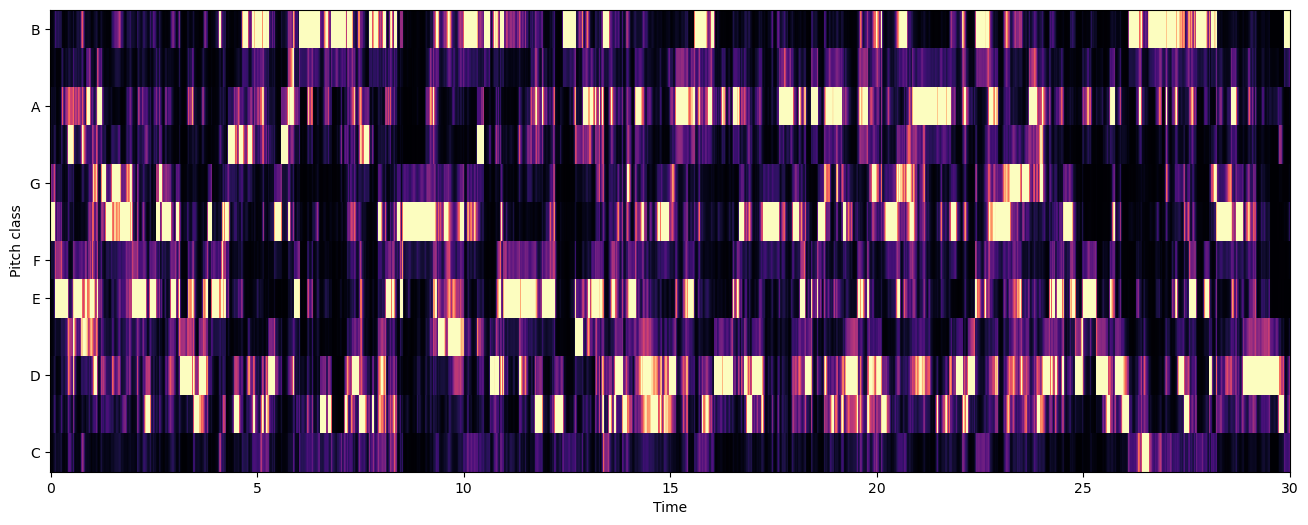

In [18]:
# 크로마 특징 추출
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=512)

plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram,x_axis='time', y_axis='chroma', hop_length=512)
plt.show()